In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

In [2]:
# To store the Paths
train_messy = "images/train/messy"
train_clean= "images/train/clean"
test_messy= "images/val/messy"
test_clean= "images/val/clean"
# image_size = 128

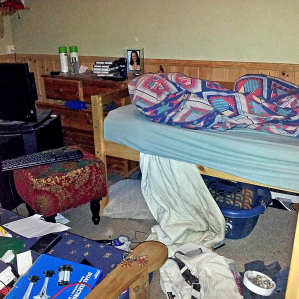

In [3]:
# ex of a messy room
Image.open("images/train/messy/45.png")

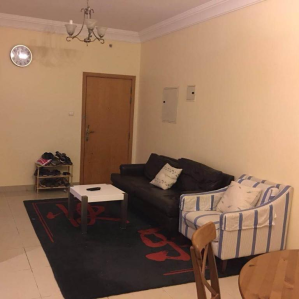

In [4]:
# ex of a clean room
Image.open("images/train/clean/45.png")

In [5]:
print(os.listdir(train_messy))

['0.png', '1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '5.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '6.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '7.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '8.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '9.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png']


In [6]:
print(os.path.join(train_messy,'67'))

images/train/messy\67


100%|█████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 444.91it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

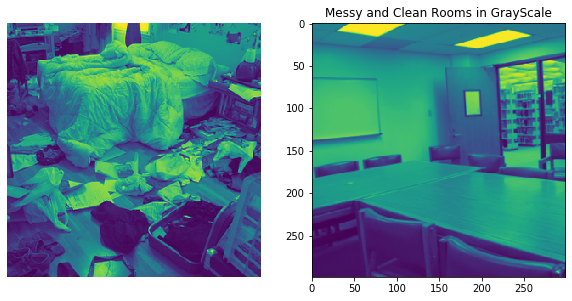

In [7]:
# tqdm is for progress bar
# size i saw from andrew ng
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    np_img=np.array(img)
    image_size = np_img.shape[0]
    img = cv2.resize(img, (image_size, image_size)).flatten()   

for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    np_img2=np.array(img2)
    image_size = np_img.shape[0]
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 

# print(image_size)
# just plotting  
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
# plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [8]:
print(image_size)

299


In [9]:
# Train Data
def train_data1():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 

    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [10]:
# Test Data
def test_data1():
    test_data_messy = [] 
    test_data_clean=[]
    
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [11]:
train_data = train_data1() 
#print(train_data)
test_data = test_data1()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 417.29it/s]


In [12]:
x_data=np.concatenate((train_data,test_data),axis=0)
# print(x_data)
#x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))  # normalize data
x_data = x_data/255
# print(x_data)

In [13]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [14]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [15]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 299, 299)
Y shape:  (212, 1)


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [17]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 89401)
X test flatten (32, 89401)


In [18]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (89401, 180)
x test:  (89401, 32)
y train:  (1, 180)
y test:  (1, 32)


## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 89401), (180, 1), (32, 89401), (32, 1))

In [22]:
model.fit(x_train, y_train)

C:\Users\91865\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.score(x_test, y_test)

0.90625

In [29]:
ans = model.predict(x_test[:10])

In [30]:
ans = list(map(lambda x :'Messy' if x else 'Clean', ans))

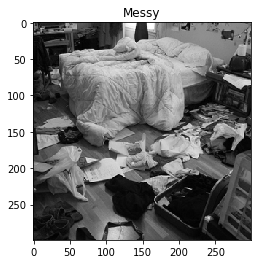

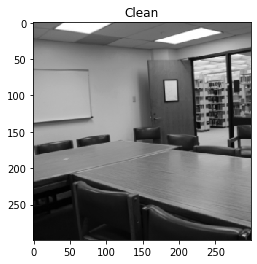

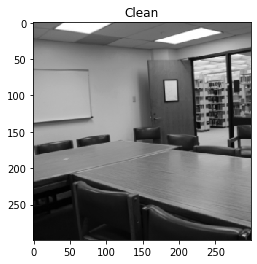

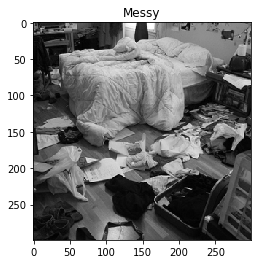

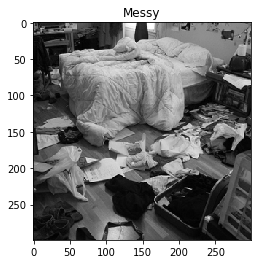

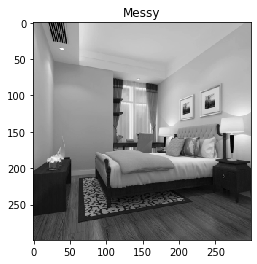

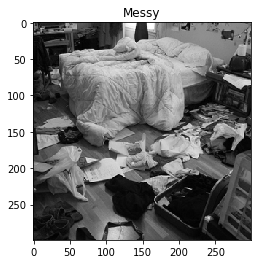

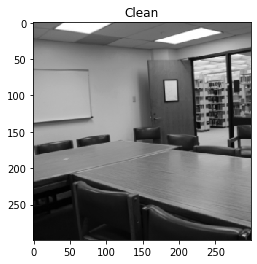

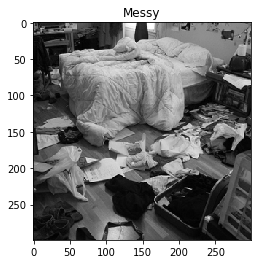

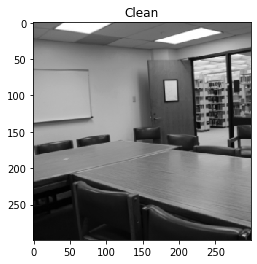

In [37]:
for i in range(len(ans)):
    plt.imshow(x_test[i].reshape(299,299),cmap = 'gray')
    plt.title(ans[i])
    plt.show()